In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [15]:
df = pd.read_csv('diabetes_final.csv')

# features numéricas
numerical_features = df.columns.drop('Outcome')

X = df[numerical_features]
y = df['Outcome']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=6, random_state=42)
X_pca = pca.fit_transform(X_scaled)

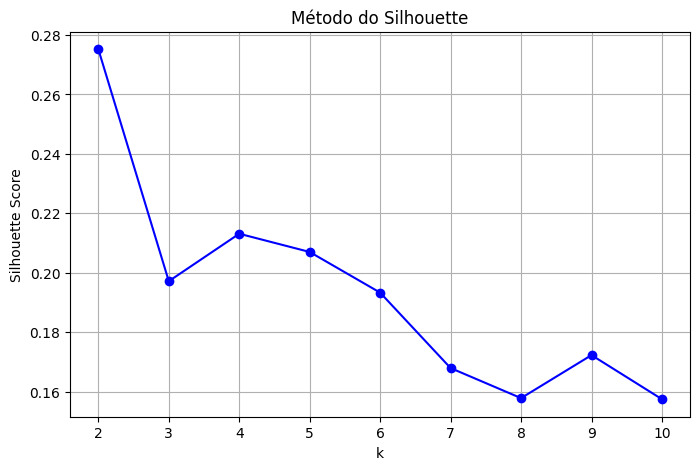

In [16]:
from sklearn.metrics import silhouette_score

sil_scores = []

k_range = range(2, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,5))
plt.plot(k_range, sil_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Método do Silhouette')
plt.grid(True)
plt.show()


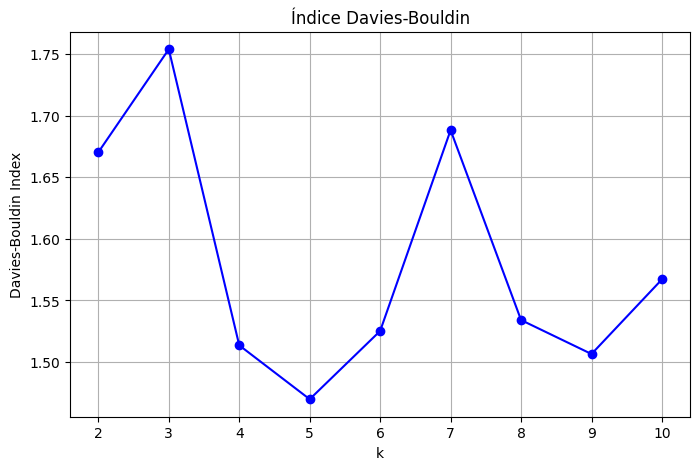

In [17]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    db = davies_bouldin_score(X_pca, labels)
    db_scores.append(db)

plt.figure(figsize=(8,5))
plt.plot(k_range, db_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Index')
plt.title('Índice Davies-Bouldin')
plt.grid(True)
plt.show()


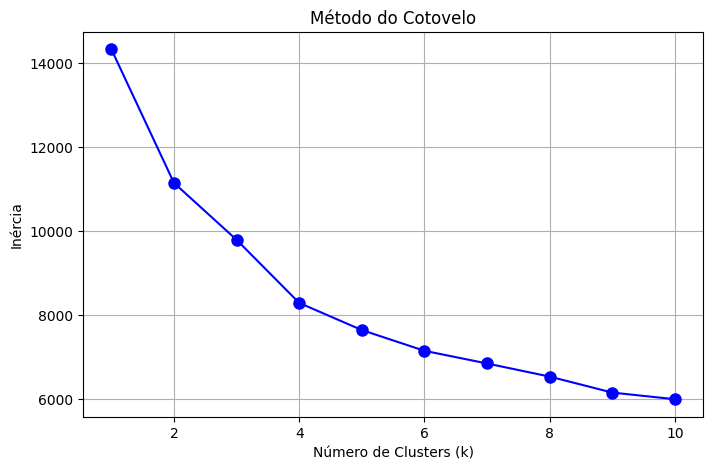

In [18]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()

A escolha de 2 clusters (k=2) foi fundamentada na convergência das métricas de validação. O Silhouette Score atingiu seu valor máximo neste ponto, indicando a melhor qualidade de coesão e separação dos grupos. O Índice Davies-Bouldin apresentou um valor consistente e o Método do Cotovelo confirmou k=2 como o ponto de inflexão ideal para o modelo.

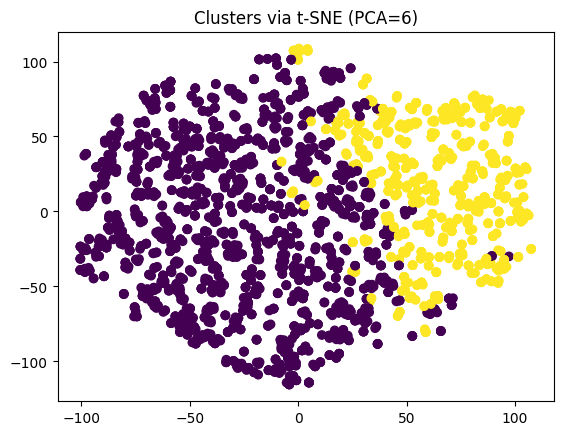

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='viridis')
plt.title("Clusters via t-SNE (PCA=6)")
plt.show()


O KMeans foi treinado com 6 dimensões (do PCA), o que é impossível de visualizar em um gráfico. O t-SNE foi usado apenas para reduzir de 6D para 2D para visualização, pois ele consegue agrupar visualmente pontos que são matematicamente próximos na alta dimensão.

In [20]:
# Cruzar os clusters criados (labels) com a coluna real (Outcome)
df['cluster_kmeans'] = labels
crosstab = pd.crosstab(df['cluster_kmeans'], df['Outcome'])

print("Comparação Cluster vs Realidade:")
print(crosstab)

Comparação Cluster vs Realidade:
Outcome            0    1
cluster_kmeans           
0               1420  548
1                396  404


KMeans é um algoritmo não-supervisionado que busca grupos geométricos bem separados (como ilhas). Dados médicos (Saudável vs. Diabético) geralmente têm sobreposição (ex: um pré-diabético é matematicamente muito parecido com um diabético inicial). O KMeans não conseguiu traçar uma fronteira clara porque as classes estão misturadas no espaço geométrico.